# Mother machine figure showing clpX degradation of FtsZ

* Updated 20180926 with fluorescence concentration, distribution plots, and statistical tests.

<a id = "toc"></a>
## Table of Contents
1. [Load data](#loaddata)
2. [Fluoresence ensemble plot](#ensemble)
3. [Fluorescence concentration plot](#flconc)

### Load modules

In [1]:
from __future__ import division

import numpy as np
import scipy.stats as stats
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
from IPython.display import display, HTML

# plotting modules and settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', color_codes=True)
sns.set_palette('deep')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Myriad Pro'

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# set axes and tick width
plt.rc('axes', linewidth=0.5)
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


<a id = 'loaddata'></a>
# 1. Load data
* For each csv, each row corresponds to a single cell lineage (which undergoes growth and division over time). 
* The first two columes are the field-of-view and channel id, which uniquely identify a lineage.
* The third column is the absolute time index
* The fourth and fifth columns are total cellular fluorescence and fluoresence concentration at the time points in the third column. 
* The times are converted to be relative to the shift time using the values below. 

In [2]:
# load data frames
clpXplus_df = pd.read_csv('./clpXplus.csv',sep=';')
clpXminus_df = pd.read_csv('./clpXminus.csv',sep=';')
    
print('There are {} lineages from clpX plus data'.format(len(clpXplus_df)))
print('There are {} lineages from clpX minus data'.format(len(clpXminus_df)))

# phase picture taking interval in minutes
cplus_time_int = 2 
cminus_time_int = 2
# fluorescent picture taking interval as a function of phase images (every 30 images = 1 hr)
cplus_fl_int = 30 
cminus_fl_int = 30
# absolute shift index time 
clpXplus_shift_t = 63 # ~2 hours after image start
clpXminus_shift_t = 125 # ~4 hours after image start
# maximum time index
cplXplus_maxt = 500 # ~16.5 hours
cplXminus_maxt = 580 # ~19.3 hours
# normalization
clpXplus_norm = 26077.098 # averages of 3 hours before shift
clpXminus_norm = 59150.879

There are 154 lineages from clpX plus data
There are 144 lineages from clpX minus data


<a id='ensemble'></a>
# 2. Total fluorescence ensemble plot
* Normalization: for each lineage, average the fluorescence total for all time points before the shift down and normalize all datapoints by that value.

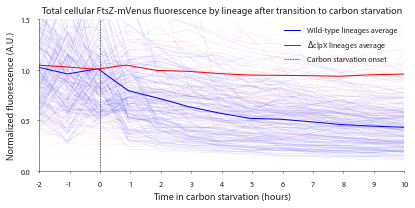

In [9]:
## Set up plot
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(6, 3), squeeze=False)
ax = axes.flat[0]

# clpXplus ######################
alt_time_clpXplus = clpXplus_shift_t * cplus_time_int / 60 # plotting by hours realtive to shift
# arrays for holding averge values
avg_times_clpXplus = list(np.arange(1, cplXplus_maxt, step=cplus_fl_int))
fl_by_time_clpXplus = [[] for i in avg_times_clpXplus]

for index, row in clpXplus_df.iterrows():
    # deal with formatting, removing brackets and convert to list of numbers
    lin_times = row['lineage_times']
    lin_times = np.array([np.int(t) for t in lin_times[1:-1].split()])
    lin_fl = row['fl_totals']
    lin_fl = np.array([np.float(t) for t in lin_fl[1:-1].split()])
    
    # normalization routine
    lin_fl = np.array([x / clpXplus_norm for x in lin_fl])
    
    # add data to averages lists
    for i, t in enumerate(lin_times):
        idx = avg_times_clpXplus.index(t)
        fl_by_time_clpXplus[idx].append(lin_fl[i])

    # convert times to hours relative to shift and plot
    lin_times = lin_times * cplus_time_int / 60 - alt_time_clpXplus
    ax.plot(lin_times, lin_fl, lw=0.5, alpha=0.1, color='blue')
            
# average data
avg_fl_clpXplus = np.array([np.mean(fl_values) for fl_values in fl_by_time_clpXplus])
# med_fl_clpXplus = [np.median(fl_values) for fl_values in fl_by_time_clpXplus]
std_fl_clpXplus = np.array([np.std(fl_values) for fl_values in fl_by_time_clpXplus])
n_fl = [len(fl_values) for fl_values in fl_by_time_clpXplus]
avg_times_clpXplus = np.array(avg_times_clpXplus) * cplus_time_int / 60 - alt_time_clpXplus
ax.plot(avg_times_clpXplus, avg_fl_clpXplus, color='blue', lw=1, label='Wild-type lineages average')

# clpXminus ######################   
alt_time_clpXminus = clpXminus_shift_t * cminus_time_int / 60 # plotting by hours realtive to shift
avg_times_clpXminus = list(np.arange(1, cplXminus_maxt, step=cminus_fl_int))
fl_by_time_clpXminus = [[] for i in avg_times_clpXminus]

for index, row in clpXminus_df.iterrows():
    # deal with formatting, removing brackets and convert to list of numbers
    lin_times = row['lineage_times']
    lin_times = np.array([np.int(t) for t in lin_times[1:-1].split()])
    lin_fl = row['fl_totals']
    lin_fl = np.array([np.float(t) for t in lin_fl[1:-1].split()])
    
    # normalization routine
    lin_fl = np.array([x / clpXminus_norm for x in lin_fl])
    
    # add data to averages lists
    for i, t in enumerate(lin_times):
        idx = avg_times_clpXminus.index(t)
        fl_by_time_clpXminus[idx].append(lin_fl[i])

    # convert times and plot
    lin_times = lin_times * cminus_time_int / 60 - alt_time_clpXminus
    ax.plot(lin_times, lin_fl, lw=0.5, ls=':', alpha=0.1, color='red')

# average data
avg_fl_clpXminus = np.array([np.mean(fl_values) for fl_values in fl_by_time_clpXminus])
# med_fl_clpXminus = [np.median(fl_values) for fl_values in fl_by_time_clpXminus]
std_fl_clpXminus = np.array([np.std(fl_values) for fl_values in fl_by_time_clpXminus])
n_fl = [len(fl_values) for fl_values in fl_by_time_clpXminus]
avg_times_clpXminus = np.array(avg_times_clpXminus) * cminus_time_int / 60 - alt_time_clpXminus
ax.plot(avg_times_clpXminus, avg_fl_clpXminus, color='red', lw=1, label='$\Delta$clpX lineages average')

##### shared plotting and formatting
# shift down 
ax.axvline(0, color='black', ls='--', lw=0.5, label='Carbon starvation onset')

# formatting
ax.set_xlabel('Time in carbon starvation (hours)')
ax.set_xticks(np.arange(-2,14,1))
ax.set_xticklabels([str(x) for x in np.arange(-2,14,1)])
ax.set_xlim([-2, 10])

ax.set_ylabel('Normalized fluorescence (A.U.)')
ax.set_yticks(np.arange(0,2.5,0.5))
ax.set_yticklabels([str(x) for x in np.arange(0,2.5,0.5)])
ax.set_ylim(bottom=0, top=1.5)

ax.legend(loc='upper right')
sns.despine()

ax.set_title('Total cellular FtsZ-mVenus fluorescence by lineage after transition to carbon starvation')
plt.tight_layout()
fig.savefig('./mothermachine_figure_20180926.pdf', dpi=600)

## Distributions

In [10]:
# pull out times for 2 hours before to 10 hours after shift
avg_times_clpXplus_cut = avg_times_clpXplus[0:13]
print(avg_times_clpXplus_cut)
fl_by_time_clpXplus_cut = fl_by_time_clpXplus[0:13]
avg_times_clpXminus_cut = avg_times_clpXminus[2:15]
print(avg_times_clpXminus_cut)
fl_by_time_clpXminus_cut = fl_by_time_clpXminus[2:15]

[-2.06666667 -1.06666667 -0.06666667  0.93333333  1.93333333  2.93333333
  3.93333333  4.93333333  5.93333333  6.93333333  7.93333333  8.93333333
  9.93333333]
[-2.13333333 -1.13333333 -0.13333333  0.86666667  1.86666667  2.86666667
  3.86666667  4.86666667  5.86666667  6.86666667  7.86666667  8.86666667
  9.86666667]


Total fluorescence distributions


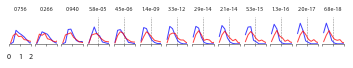

,t-test pval,K-S pval,M-W pval,median pval
-2,0.75615,0.04605,0.77435,0.85377
-1,0.26569,0.16280,0.50268,0.94740
0,0.93968,0.02334,0.87952,0.85777
1,0.00006,0.00128,0.00057,0.00216
2,0.00000,0.00303,0.00004,0.00211
3,0.00000,0.00000,0.00000,0.00005
4,0.00000,0.00000,0.00000,0.00000
5,0.00000,0.00000,0.00000,0.00000
6,0.00000,0.00000,0.00000,0.00000
7,0.00000,0.00000,0.00000,0.00000


In [11]:
fig, axes = plt.subplots(ncols=13, nrows=1, figsize=(6,0.5))
ax = axes.flat

bin_edges = np.arange(0, 3, 0.25)
bin_centers = bin_edges[:-1] + 0.25/2

pval_df = pd.DataFrame([])
pvals = []

for i, axis in enumerate(ax):

    # calculate histogram for both datasets
    bin_vals, foo = np.histogram(fl_by_time_clpXplus_cut[i], bins=bin_edges, density=True)
    axis.plot(bin_centers, bin_vals, color='blue', alpha=0.75, lw=1)

    bin_vals, foo = np.histogram(fl_by_time_clpXminus_cut[i], bins=bin_edges, density=True)
    axis.plot(bin_centers, bin_vals, color='red', alpha=0.75, lw=1)

    ### Various statistical tests
    # calculate unequal variance t statistic 
    tstat, ttpval = stats.ttest_ind(fl_by_time_clpXplus_cut[i], fl_by_time_clpXminus_cut[i],
                            equal_var=False)
#     print('ttest', i, tstat, ttpval)
    
    # KS test
    ksstat, ks_pval = stats.ks_2samp(fl_by_time_clpXminus_cut[i], fl_by_time_clpXplus_cut[i])
#     print('KS test', ksstat, ks_pval)

    
    # Mann-Whitney
    mwstat, mwpval = stats.mannwhitneyu(fl_by_time_clpXminus_cut[i], fl_by_time_clpXplus_cut[i],
                                        alternative='greater')
#     print('Mann-Whitney', mwstat, mwpval)
    
    # Mood's median test
    median_args = (fl_by_time_clpXminus_cut[i],
                   fl_by_time_clpXplus_cut[i])
    mstat, mpval, _, _ = stats.median_test(*median_args)
#     print('Median test', mstat, mpval)
#     print('\n')

    # F test for variance
    var1 = np.var(fl_by_time_clpXplus_cut[i])
    df1 = len(fl_by_time_clpXplus_cut[i])-1
    var2 = np.var(fl_by_time_clpXminus_cut[i])
    df2 = len(fl_by_time_clpXminus_cut[i])-1
    if var1 > var2:
        F = var1 / var2
        fpval = stats.f.sf(F, df1, df2)
    else:
        F = var2 / var1
        fpval = stats.f.sf(F, df2, df1)
    
    if ttpval > 0.01:
        pval_title = '{:.3f}'.format(ttpval)
    else:
        pval_title = '{:.1e}'.format(ttpval)
    
    axis.set_title(pval_title, fontsize=SMALL_SIZE*0.75)

    pvals.append((ttpval, ks_pval, mwpval, mpval, fpval))

    axis.set_xlim((0, 2))
    axis.set_xticks([0, 1, 2])
    axis.set_xticklabels([])
    axis.set_ylim((0,2.25))
    axis.get_yaxis().set_visible(False)
    
    if ttpval < 0.05:
        axis.axvline(1, color='black', lw=0.5, ls='--', alpha=0.5, zorder=0)
    
ax[0].set_xticklabels([0, 1, 2])
    
sns.despine(left=True)
plt.subplots_adjust(hspace=0.0001)

print('Total fluorescence distributions')

# plt.tight_layout()
fig.savefig('./mothermachine_dist_20180926.pdf', dpi=600)
plt.show()


ttpval, ks_pval, mwpval, mpval, fpval = zip(*pvals)
pval_df['t-test pval'] = ttpval
pval_df['K-S pval'] = ks_pval
pval_df['M-W pval'] = mwpval
pval_df['median pval'] = mpval
# pval_df['F pval'] = fpval
pval_df.index = range(-2, 11)
display(pval_df)
pval_df.to_csv('./fl_total_pvals.csv')

<a id='flconc'></a>
# 3. Fluorescence concentration over time
* Normalization factor is average of lineages from first three hours before shift.

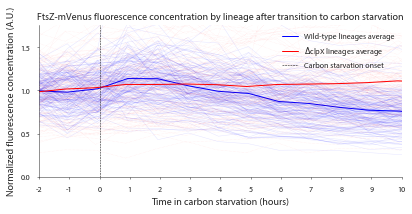

In [12]:
clpXplus_concnorm = 7.111
clpXminus_concnorm = 16.4426

## Set up plot
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(6, 3), squeeze=False)
ax = axes.flat[0]

# clpXplus ######################
alt_time_clpXplus = clpXplus_shift_t * cplus_time_int / 60 # plotting by hours realtive to shift
# arrays for holding averge values
avg_times_clpXplus = list(np.arange(1, cplXplus_maxt, step=cplus_fl_int))
fl_by_time_clpXplus = [[] for i in avg_times_clpXplus]

for index, row in clpXplus_df.iterrows():
    # deal with formatting, removing brackets and convert to list of numbers
    lin_times = row['lineage_times']
    lin_times = np.array([np.int(t) for t in lin_times[1:-1].split()])
    lin_fl = row['fl_concs']
    lin_fl = np.array([np.float(t) for t in lin_fl[1:-1].split()])
    
    # normalization routine
    lin_fl = np.array([x / clpXplus_concnorm for x in lin_fl])
    
    # add data to averages lists
    for i, t in enumerate(lin_times):
        idx = avg_times_clpXplus.index(t)
        fl_by_time_clpXplus[idx].append(lin_fl[i])

    # convert times to hours relative to shift and plot
    lin_times = lin_times * cplus_time_int / 60 - alt_time_clpXplus
    ax.plot(lin_times, lin_fl, lw=0.5, alpha=0.1, color='blue')
            
# average data
avg_fl_clpXplus = np.array([np.mean(fl_values) for fl_values in fl_by_time_clpXplus])
# med_fl_clpXplus = [np.median(fl_values) for fl_values in fl_by_time_clpXplus]
std_fl_clpXplus = np.array([np.std(fl_values) for fl_values in fl_by_time_clpXplus])
n_fl = [len(fl_values) for fl_values in fl_by_time_clpXplus]
avg_times_clpXplus = np.array(avg_times_clpXplus) * cplus_time_int / 60 - alt_time_clpXplus
ax.plot(avg_times_clpXplus, avg_fl_clpXplus, color='blue', lw=1, label='Wild-type lineages average')

# clpXminus ######################   
alt_time_clpXminus = clpXminus_shift_t * cminus_time_int / 60 # plotting by hours realtive to shift
avg_times_clpXminus = list(np.arange(1, cplXminus_maxt, step=cminus_fl_int))
fl_by_time_clpXminus = [[] for i in avg_times_clpXminus]

for index, row in clpXminus_df.iterrows():
    # deal with formatting, removing brackets and convert to list of numbers
    lin_times = row['lineage_times']
    lin_times = np.array([np.int(t) for t in lin_times[1:-1].split()])
    lin_fl = row['fl_concs']
    lin_fl = np.array([np.float(t) for t in lin_fl[1:-1].split()])
    
    # normalization routine
    lin_fl = np.array([x / clpXminus_concnorm for x in lin_fl])
    
    # add data to averages lists
    for i, t in enumerate(lin_times):
        idx = avg_times_clpXminus.index(t)
        fl_by_time_clpXminus[idx].append(lin_fl[i])

    # convert times and plot
    lin_times = lin_times * cminus_time_int / 60 - alt_time_clpXminus
    ax.plot(lin_times, lin_fl, lw=0.5, ls=':', alpha=0.1, color='red')

# average data
avg_fl_clpXminus = np.array([np.mean(fl_values) for fl_values in fl_by_time_clpXminus])
# med_fl_clpXminus = [np.median(fl_values) for fl_values in fl_by_time_clpXminus]
std_fl_clpXminus = np.array([np.std(fl_values) for fl_values in fl_by_time_clpXminus])
n_fl = [len(fl_values) for fl_values in fl_by_time_clpXminus]
avg_times_clpXminus = np.array(avg_times_clpXminus) * cminus_time_int / 60 - alt_time_clpXminus
ax.plot(avg_times_clpXminus, avg_fl_clpXminus, color='red', lw=1, label='$\Delta$clpX lineages average')

##### shared plotting and formatting
# shift down 
ax.axvline(0, color='black', ls='--', lw=0.5, label='Carbon starvation onset')

# formatting
ax.set_xlabel('Time in carbon starvation (hours)')
ax.set_xticks(np.arange(-2,14,1))
ax.set_xticklabels([str(x) for x in np.arange(-2,14,1)])
ax.set_xlim([-2, 10])

ax.set_ylabel('Normalized fluorescence concentration (A.U.)')
ax.set_yticks(np.arange(0,2.5,0.5))
ax.set_yticklabels([str(x) for x in np.arange(0,2.5,0.5)])
ax.set_ylim(bottom=0, top=1.75)

ax.legend(loc='upper right')
sns.despine()

ax.set_title('FtsZ-mVenus fluorescence concentration by lineage after transition to carbon starvation')
plt.tight_layout()
fig.savefig('./mothermachine_figure_flconc_20180926.pdf', dpi=600)

In [13]:
# pull out times for 2 hours before to 10 hours after shift
avg_times_clpXplus_cut = avg_times_clpXplus[0:13]
print(avg_times_clpXplus_cut)
fl_by_time_clpXplus_cut = fl_by_time_clpXplus[0:13]
avg_times_clpXminus_cut = avg_times_clpXminus[2:15]
print(avg_times_clpXminus_cut)
fl_by_time_clpXminus_cut = fl_by_time_clpXminus[2:15]

[-2.06666667 -1.06666667 -0.06666667  0.93333333  1.93333333  2.93333333
  3.93333333  4.93333333  5.93333333  6.93333333  7.93333333  8.93333333
  9.93333333]
[-2.13333333 -1.13333333 -0.13333333  0.86666667  1.86666667  2.86666667
  3.86666667  4.86666667  5.86666667  6.86666667  7.86666667  8.86666667
  9.86666667]


Fluorescence conc. distributions


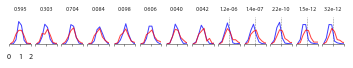

,t-test pval,K-S pval,M-W pval,median pval
-2,0.59468,0.00787,0.83557,0.85377
-1,0.30322,0.08791,0.19543,0.16831
0,0.70430,0.21904,0.49340,0.95391
1,0.08443,0.02966,0.98335,0.08160
2,0.09789,0.01524,0.96329,0.15586
3,0.60605,0.32577,0.31334,0.76912
4,0.04005,0.10046,0.03833,0.15870
5,0.04191,0.10484,0.05313,0.21520
6,0.00000,0.00036,0.00003,0.00035
7,0.00000,0.00000,0.00000,0.00001


In [14]:
fig, axes = plt.subplots(ncols=13, nrows=1, figsize=(6,0.5))
ax = axes.flat

bin_edges = np.arange(0, 3, 0.25)
bin_centers = bin_edges[:-1] + 0.25/2

pval_df = pd.DataFrame([])
pvals = []

for i, axis in enumerate(ax):

    # calculate histogram for both datasets
    bin_vals, foo = np.histogram(fl_by_time_clpXplus_cut[i], bins=bin_edges, density=True)
    axis.plot(bin_centers, bin_vals, color='blue', alpha=0.75, lw=1)

    bin_vals, foo = np.histogram(fl_by_time_clpXminus_cut[i], bins=bin_edges, density=True)
    axis.plot(bin_centers, bin_vals, color='red', alpha=0.75, lw=1)

    ### Various statistical tests
    # calculate unequal variance t statistic 
    tstat, ttpval = stats.ttest_ind(fl_by_time_clpXplus_cut[i], fl_by_time_clpXminus_cut[i],
                            equal_var=False)
#     print('ttest', i, tstat, ttpval)
    
    # KS test
    ksstat, ks_pval = stats.ks_2samp(fl_by_time_clpXminus_cut[i], fl_by_time_clpXplus_cut[i])
#     print('KS test', ksstat, ks_pval)

    
    # Mann-Whitney
    mwstat, mwpval = stats.mannwhitneyu(fl_by_time_clpXminus_cut[i], fl_by_time_clpXplus_cut[i],
                                        alternative='greater')
#     print('Mann-Whitney', mwstat, mwpval)
    
    # Mood's median test
    median_args = (fl_by_time_clpXminus_cut[i],
                   fl_by_time_clpXplus_cut[i])
    mstat, mpval, _, _ = stats.median_test(*median_args)
#     print('Median test', mstat, mpval)
#     print('\n')

    # F test for variance
    var1 = np.var(fl_by_time_clpXplus_cut[i])
    df1 = len(fl_by_time_clpXplus_cut[i])-1
    var2 = np.var(fl_by_time_clpXminus_cut[i])
    df2 = len(fl_by_time_clpXminus_cut[i])-1
    if var1 > var2:
        F = var1 / var2
        fpval = stats.f.sf(F, df1, df2)
    else:
        F = var2 / var1
        fpval = stats.f.sf(F, df2, df1)
    
    if ttpval > 0.01:
        pval_title = '{:.3f}'.format(ttpval)
    else:
        pval_title = '{:.1e}'.format(ttpval)
    
    axis.set_title(pval_title, fontsize=SMALL_SIZE*0.75)

    pvals.append((ttpval, ks_pval, mwpval, mpval, fpval))

    axis.set_xlim((0, 2))
    axis.set_xticks([0, 1, 2])
    axis.set_xticklabels([])
    axis.set_ylim((0,2.25))
    axis.get_yaxis().set_visible(False)
    
    if ttpval < 0.01:
        axis.axvline(1, color='black', lw=0.5, ls='--', alpha=0.5, zorder=0)
    
ax[0].set_xticklabels([0, 1, 2])
    
sns.despine(left=True)
plt.subplots_adjust(hspace=0.0001)

print('Fluorescence conc. distributions')

fig.savefig('./mothermachine_dist_flconc_20180926.pdf', dpi=600)
# plt.tight_layout()
plt.show()

ttpval, ks_pval, mwpval, mpval, fpval = zip(*pvals)
pval_df['t-test pval'] = ttpval
pval_df['K-S pval'] = ks_pval
pval_df['M-W pval'] = mwpval
pval_df['median pval'] = mpval
# pval_df['F pval'] = fpval
pval_df.index = range(-2, 11)
display(pval_df)
pval_df.to_csv('./fl_conc_pvals.csv')